In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import imageio
import matplotlib.ticker as ticker
import pickle



Bad key "text.kerning_factor" on line 4 in
C:\Users\ek672\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:

def quiver_geopot_plot(U,V,Phi,lambdas,mus,sparseness):
    
    X = lambdas*180/np.pi
    Y = np.arcsin(mus)*180/np.pi

    plt.contourf(X, Y, (Phi))
    
    bounds=[-100000,1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6]
    bounds=np.array(bounds)+4*10**6
    bounds2=np.interp(np.linspace(4*10**6-100000,4*10**6+3.8*10**6,len(bounds)*20),bounds,bounds)

    CS = plt.contourf(X, Y, (Phi), levels=bounds2, cmap=cm.nipy_spectral, extend='both')  
    colorbar = plt.colorbar(CS)
    
    Xsparse=X[0::sparseness]
    Ysparse=Y[0::sparseness]
  
    Usparse=U[0::sparseness,0::sparseness]
    Vsparse=V[0::sparseness,0::sparseness]


    plt.quiver(Xsparse,Ysparse,Usparse,Vsparse)

    plt.show()
    

In [3]:
def read_pickle(filename):
    infile = open(filename,'rb')
    var = pickle.load(infile)
    infile.close()
    return var

In [4]:
PhiA3Taurad0p1=read_pickle('Phi-a3-taurad0p1')
PhiA3Taurad1=read_pickle('Phi-a3-taurad1')
PhiA3Taurad10=read_pickle('Phi-a3-taurad10')

PhiPBSTaurad0p1=read_pickle('Phi-PBS-taurad0p1')
PhiPBSTaurad1=read_pickle('Phi-PBS-taurad1')
PhiPBSTaurad10=read_pickle('Phi-PBS-taurad10')

UA3Taurad0p1=read_pickle('U-a3-taurad0p1')
UA3Taurad1=read_pickle('U-a3-taurad1')
UA3Taurad10=read_pickle('U-a3-taurad10')

UPBSTaurad0p1=read_pickle('U-PBS-taurad0p1')
UPBSTaurad1=read_pickle('U-PBS-taurad1')
UPBSTaurad10=read_pickle('U-PBS-taurad10')

VA3Taurad0p1=read_pickle('V-a3-taurad0p1')
VA3Taurad1=read_pickle('V-a3-taurad1')
VA3Taurad10=read_pickle('V-a3-taurad10')

VPBSTaurad0p1=read_pickle('V-PBS-taurad0p1')
VPBSTaurad1=read_pickle('V-PBS-taurad1')
VPBSTaurad10=read_pickle('V-PBS-taurad10')

mus=read_pickle('mus')
lambdas=read_pickle('lambdas')

sparseness=4

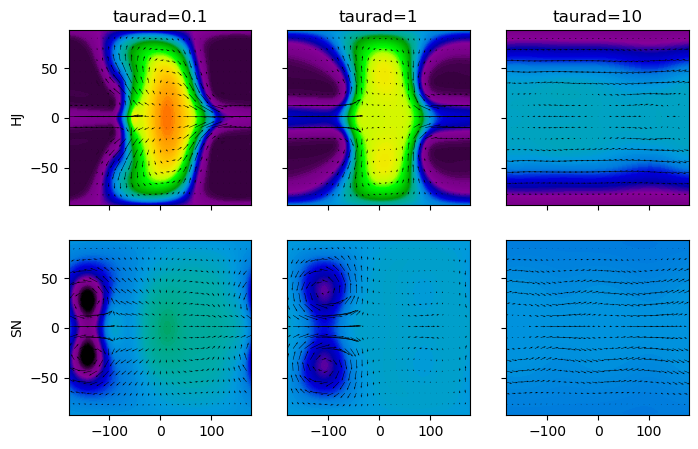

In [68]:


fig, axs=plt.subplots(2,3,sharex=True,sharey=True, gridspec_kw=dict(height_ratios=[1, 1], width_ratios=[2, 2, 2]),figsize=(8,5))


plt.rcParams['text.usetex'] = False

X = lambdas*180/np.pi
Y = np.arcsin(mus)*180/np.pi

    
Xsparse=X[0::sparseness]
Ysparse=Y[0::sparseness]

bounds=[-100000,1.2*10**4,4.4*10**5,8.6*10**5,1.3*10**6,1.7*10**6,2.1*10**6,2.6*10**6,3.0*10**6,3.4*10**6,3.8*10**6]
bounds=np.array(bounds)+4*10**6
bounds2=np.interp(np.linspace(4*10**6-100000,4*10**6+3.8*10**6,len(bounds)*20),bounds,bounds)-4*10**6
CS = plt.contourf(X, Y, PhiPBSTaurad0p1, levels=bounds2, cmap=cm.nipy_spectral, extend='both')  
#colorbar = plt.colorbar(CS)

#axs[0,0].contourf(X, Y, PhiPBSTaurad0p1+40*10**6,levels=bounds2, cmap=cm.nipy_spectral, extend='both')

UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]

aspectratio=1


axs[0,0].quiver(Xsparse,Ysparse,UPhiPBSTaurad0p1sparse,VPhiPBSTaurad0p1sparse)


axs[0,0].contourf(X, Y, PhiPBSTaurad0p1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad0p1sparse=UPBSTaurad0p1[0::sparseness,0::sparseness]
VPhiPBSTaurad0p1sparse=VPBSTaurad0p1[0::sparseness,0::sparseness]
axs[0,0].quiver(Xsparse,Ysparse,UPhiPBSTaurad0p1sparse,VPhiPBSTaurad0p1sparse)
axs[0,0].set_title('taurad=0.1')
axs[0,0].set_ylabel('HJ')


axs[0,1].contourf(X, Y, PhiPBSTaurad1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad1sparse=UPBSTaurad1[0::sparseness,0::sparseness]
VPhiPBSTaurad1sparse=VPBSTaurad1[0::sparseness,0::sparseness]
axs[0,1].quiver(Xsparse,Ysparse,UPhiPBSTaurad1sparse,VPhiPBSTaurad1sparse)
axs[0,1].set_title('taurad=1')


axs[0,2].contourf(X, Y, PhiPBSTaurad10, cmap=cm.nipy_spectral,levels=bounds2)
UPhiPBSTaurad10sparse=UPBSTaurad10[0::sparseness,0::sparseness]
VPhiPBSTaurad10sparse=VPBSTaurad10[0::sparseness,0::sparseness]
axs[0,2].quiver(Xsparse,Ysparse,UPhiPBSTaurad10sparse,VPhiPBSTaurad10sparse)
axs[0,2].set_title('taurad=10')

    
axs[1,0].contourf(X, Y, PhiA3Taurad0p1, cmap=cm.nipy_spectral,levels=bounds2,extend='both')
UPhiA3Taurad0p1sparse=UA3Taurad0p1[0::sparseness,0::sparseness]
VPhiA3Taurad0p1sparse=VA3Taurad0p1[0::sparseness,0::sparseness]
axs[1,0].quiver(Xsparse,Ysparse,UPhiA3Taurad0p1sparse,VPhiA3Taurad0p1sparse)
axs[1,0].set_ylabel('SN')


axs[1,1].contourf(X, Y, PhiA3Taurad1, cmap=cm.nipy_spectral,levels=bounds2)
UPhiA3Taurad1sparse=UA3Taurad1[0::sparseness,0::sparseness]
VPhiA3Taurad1sparse=VA3Taurad1[0::sparseness,0::sparseness]
axs[1,1].quiver(Xsparse,Ysparse,UPhiA3Taurad1sparse,VPhiA3Taurad1sparse)


axs[1,2].contourf(X, Y, PhiA3Taurad10, cmap=cm.nipy_spectral,levels=bounds2)
UPhiA3Taurad10sparse=UA3Taurad10[0::sparseness,0::sparseness]
VPhiA3Taurad10sparse=VA3Taurad10[0::sparseness,0::sparseness]
axs[1,2].quiver(Xsparse,Ysparse,UPhiA3Taurad10sparse,VPhiA3Taurad10sparse)    



#fig.subplots_adjust(right=0.9)

#cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.7])
#fig.colorbar(CS,ax=axs.ravel().tolist())
plt.savefig('test.png', dpi = 300)
plt.show()

